In [ ]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd


cbg_path='\demo_data\\cbg_shp\\'


def GenerateResult(CITY):
    CITY=CITY
    ## Input data
    cbg=gpd.read_file(cbg_path+CITY+'_cbg.shp')
    Z_pred=pd.read_csv(f'Z_{CITY}.csv',sep=' ',header=None) ## 03-01

    ## Data processing
    cbg.sort_values('GEOID_1',inplace=True)
    cbg['GEOID_1'].apply(int)
    uniqueID=cbg['GEOID_1'].unique()
    uniqueID.sort()



    ## Match data
    key=range(0,len(cbg))
    dic_id = dict(zip(key, uniqueID))
    dic_id_new = dict([(value, key) for (key, value) in dic_id.items()])
    cbg['INDEX']=cbg.GEOID_1.map(dic_id_new)
    cbg.set_index('INDEX',inplace=True) ##
    result=pd.concat([cbg,Z_pred],axis=1)

    ## Visulization
    import matplotlib.pyplot as plt
    import matplotlib.colors as colors
    mycolor=['#E5E7E9','#AED6F1'] #
    cmap_color = colors.LinearSegmentedColormap.from_list('my_list', mycolor)
    N=Z_pred.shape[1]
    for i in range(N):
        result.plot(i, figsize=(15, 15),legend=False,cmap=cmap_color,edgecolor='#B2BABB',alpha=0.9)
        plt.axis('off')
        outpath=str(i)+'_weekends_10.png'

    ## Output
    result['overlap_count']=result.iloc[:,41:51].sum(axis=1)
    result.plot('overlap_count', figsize=(15, 15),legend=True,cmap='GnBu')
    result.columns = result.columns.astype(str)

    result.to_csv(f'D:\\GNN\\OCD\\Multicity\\result_{CITY}.csv')


D:\Anaconda\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


<ipython-input-1-74537cba3325>:54: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  result.to_file(f'D:\\GNN\\OCD\\Multicity\\result_{CITY}.shp')


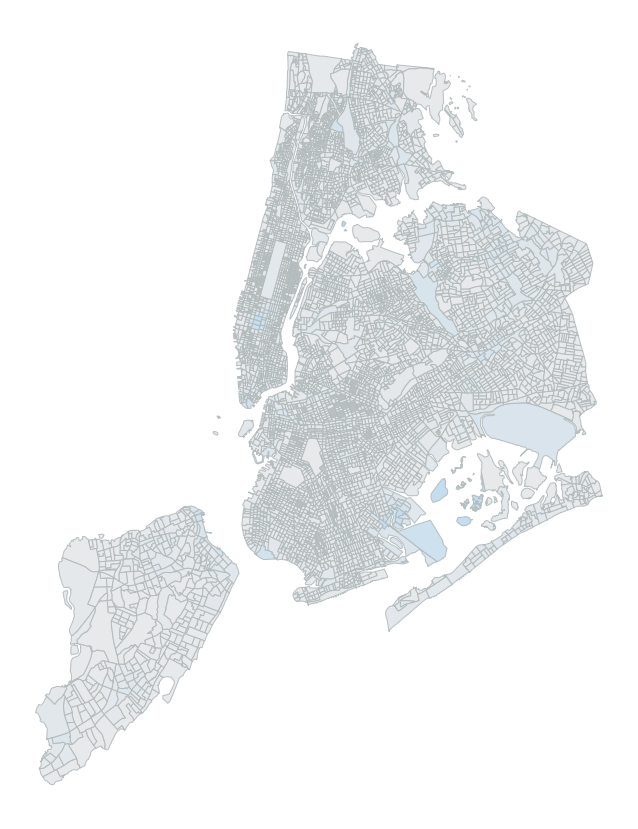

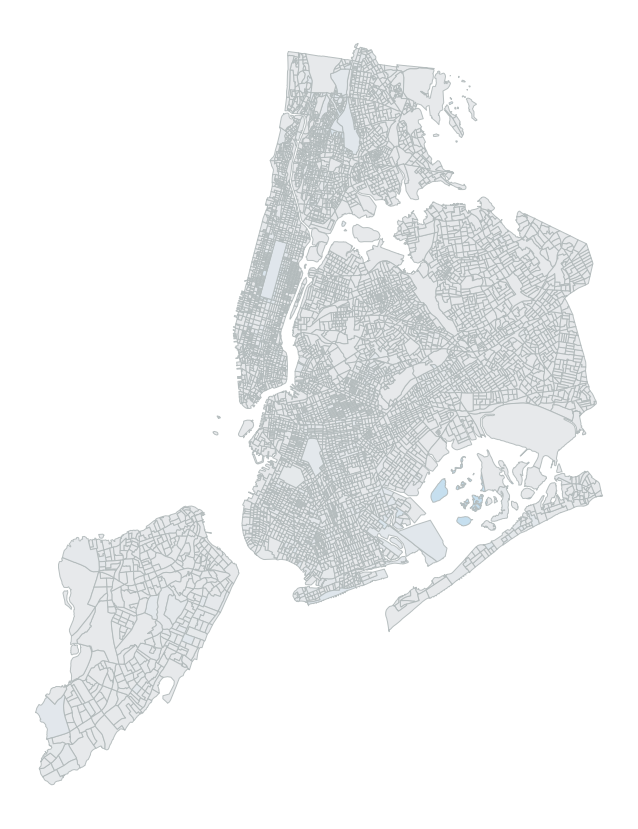

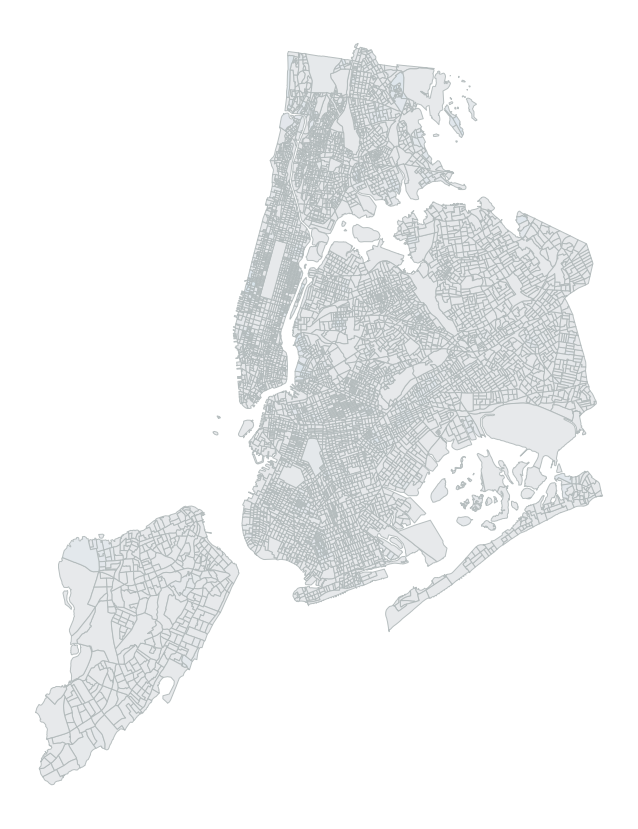

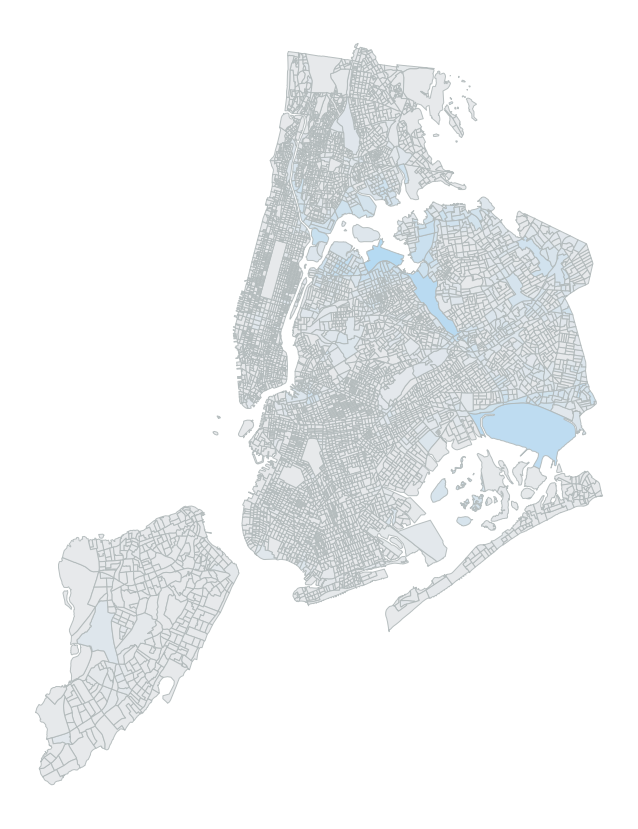

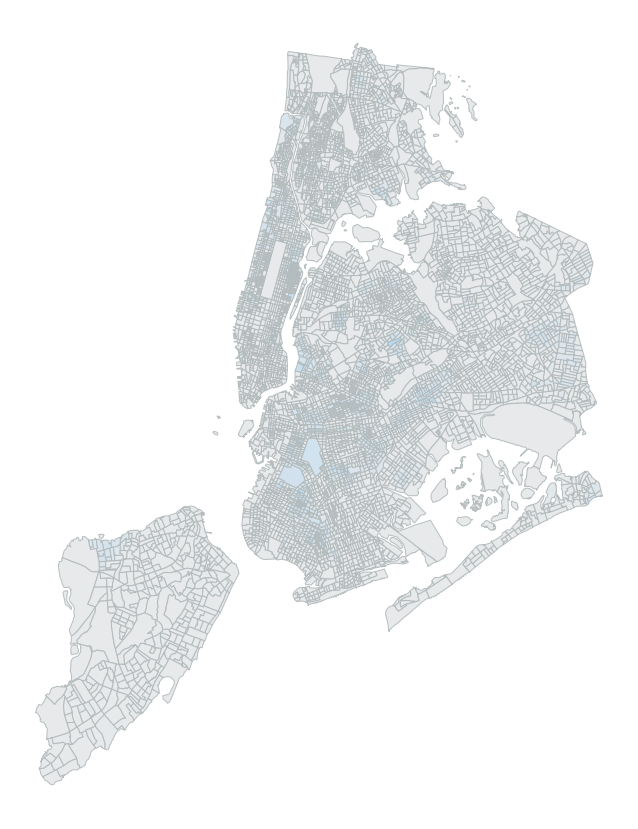

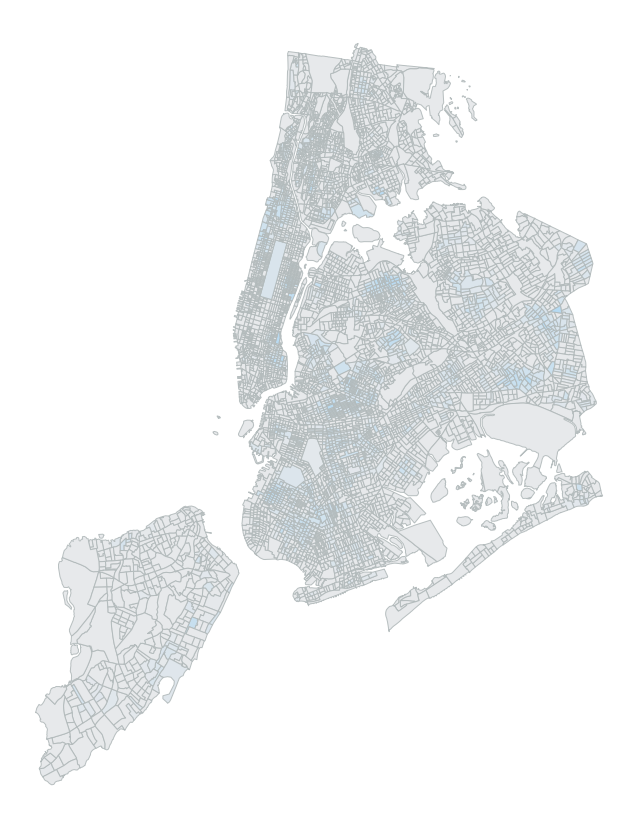

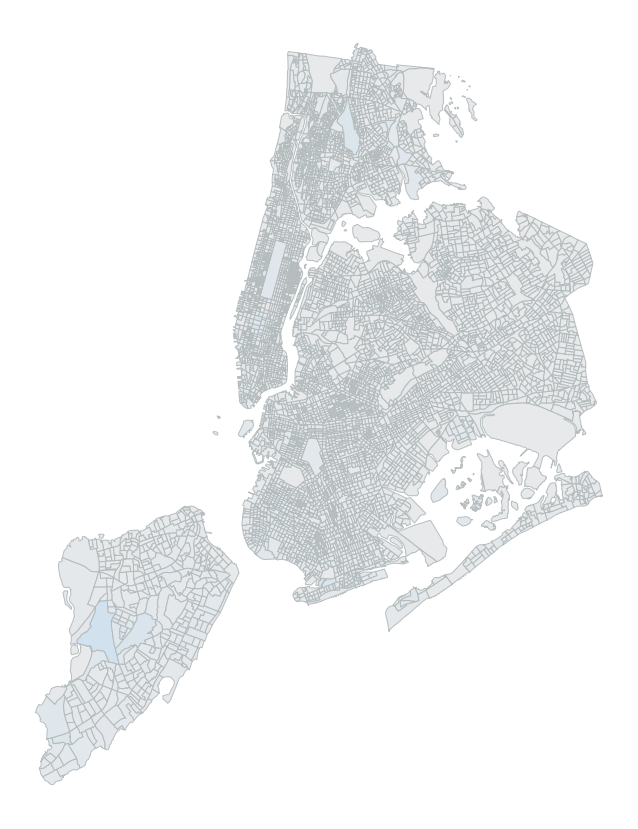

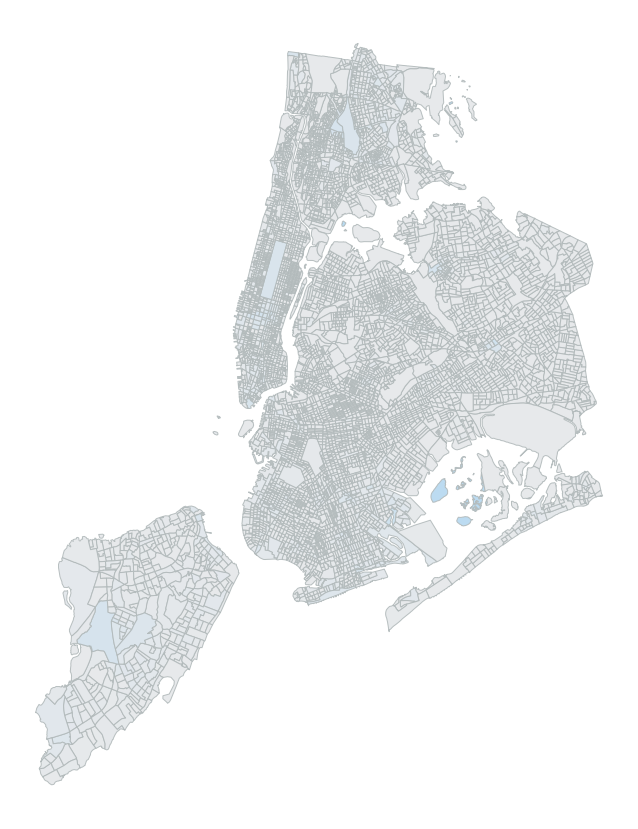

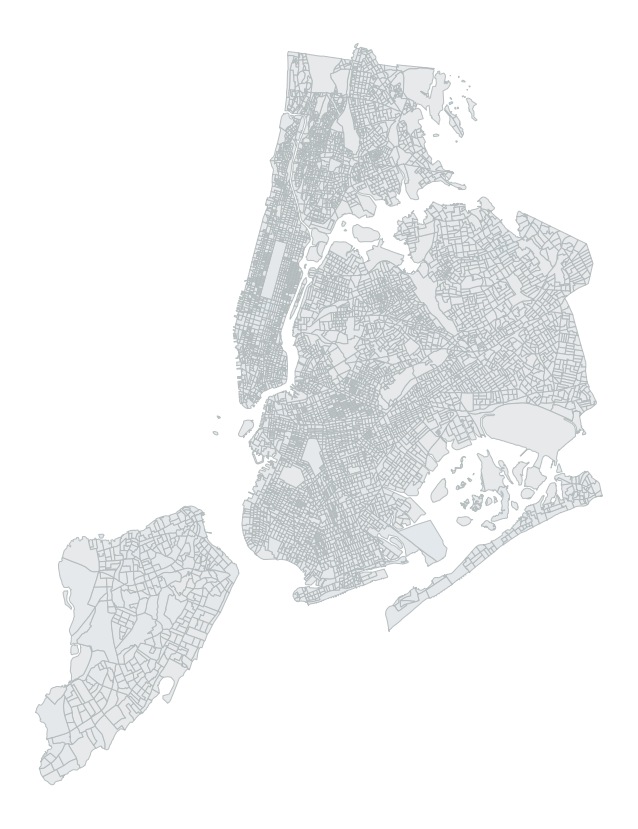

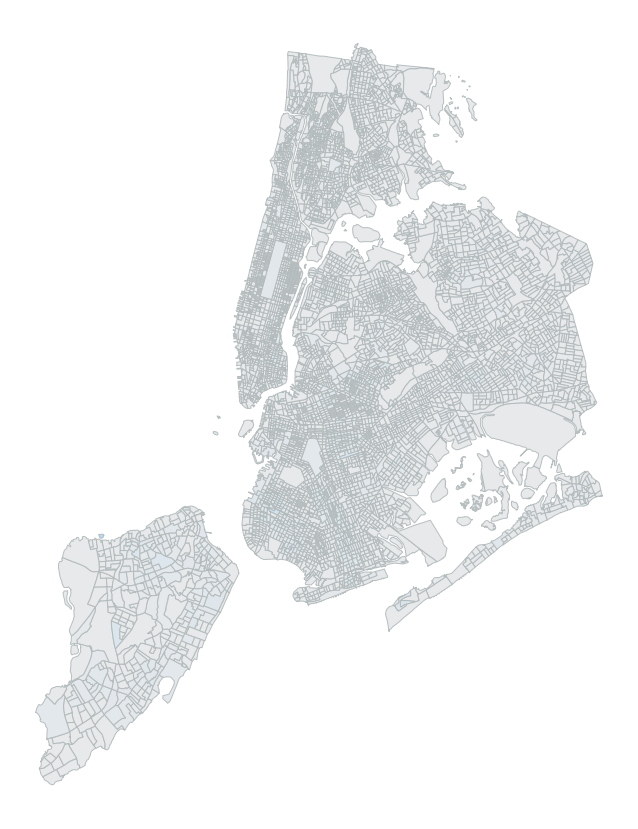

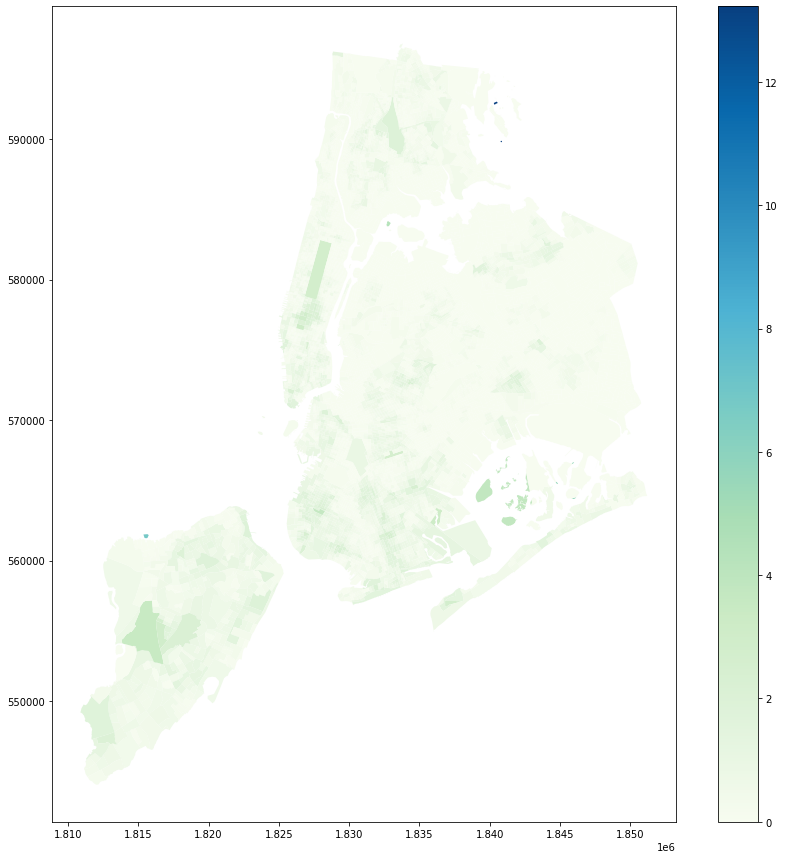

In [ ]:
GenerateResult("New York")

In [ ]:
city_list=[ 'Indianapolis', 'Jacksonville', 'Kansas City', 'Las Vegas', 'Long Beach', 'Los Angeles', 'Louisville+Jefferson County metro government', 'Memphis', 'Mesa', 'Miami', 'Milwaukee', 'Minneapolis', 'Nashville-Davidson metropolitan government', 'Oakland', 'Oklahoma City', 'Omaha', 'Philadelphia', 'Phoenix', 'Portland', 'Raleigh', 'Sacramento', 'San Antonio', 'San Diego', 'San Francisco', 'San Jose', 'Seattle', 'Tampa', 'Tucson', 'Tulsa', 'Virginia Beach', 'Washington', 'Wichita']



for city in city_list:
    print(city)
    GenerateResult(city)

## POI entropy

In [ ]:
import pandas as pd
from scipy.stats import entropy


entropies = poi.apply(lambda x: entropy(x.value_counts(normalize=True), base=2), axis=1)
poi['entropies'] = entropies


In [ ]:
entropies

0       1.014404
1       0.258019
2       1.014404
3       0.807670
4       0.927448
          ...   
2586    0.000000
2587    0.000000
2588    0.000000
2589    0.000000
2590    0.000000
Length: 2591, dtype: float64

In [ ]:
result['entropies']=entropies

In [ ]:
result['entropies']

0       1.014404
1       0.258019
2       1.014404
3       0.807670
4       0.927448
          ...   
2586    0.000000
2587    0.000000
2588    0.000000
2589    0.000000
2590    0.000000
Name: entropies, Length: 2591, dtype: float64

In [ ]:
result

index          GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE  \
0     270030501071  G27000300501071      27      003  050107        1   
1     270030501072  G27000300501072      27      003  050107        2   
2     270030501081  G27000300501081      27      003  050108        1   
3     270030501082  G27000300501082      27      003  050108        2   
4     270030501083  G27000300501083      27      003  050108        3   
...            ...              ...     ...      ...     ...      ...   
2586  271711009003  G27017101009003      27      171  100900        3   
2587  271711009004  G27017101009004      27      171  100900        4   
2588  271711010012  G27017101010012      27      171  101001        2   
2589  271711010013  G27017101010013      27      171  101001        3   
2590  271711011021  G27017101011021      27      171  101102        1   

           NAMELSAD  MTFCC FUNCSTAT       ALAND  ...         2    3    4    5  \
0     Block Group 1  G5030        S   9966740.0  ...  0.965522  0.0  0.0  0.0   
1     Block Group 2  G5030        S  25302838.0  ...  0.525281  0.0  0.0  0.0   
2     Block Group 1  G5030        S   9864998.0  ...  0.907683  0.0  0.0  0.0   
3     Block Group 2  G5030        S  13524765.0  ...  0.705991  0.0  0.0  0.0   
4     Block Group 3  G5030        S   3408697.0  ...  0.902420  0.0  0.0  0.0   
...             ...    ...      ...         ...  ...       ...  ...  ...  ...   
2586  Block Group 3  G5030        S   9102736.0  ...       NaN  NaN  NaN  NaN   
2587  Block Group 4  G5030        S  38623948.0  ...       NaN  NaN  NaN  NaN   
2588  Block Group 2  G5030        S  16459912.0  ...       NaN  NaN  NaN  NaN   
2589  Block Group 3  G5030        S  68178246.0  ...       NaN  NaN  NaN  NaN   
2590  Block Group 1  G5030        S  81606201.0  ...       NaN  NaN  NaN  NaN   

        6    7    8    9  overlap_count  entropies  
0     0.0  0.0  0.0  0.0       0.965522   1.014404  
1     0.0  0.0  0.0  0.0       0.525281   0.258019  
2     0.0  0.0  0.0  0.0       0.907683   1.014404  
3     0.0  0.0  0.0  0.0       0.705991   0.807670  
4     0.0  0.0  0.0  0.0       0.902420   0.927448  
...   ...  ...  ...  ...            ...        ...  
2586  NaN  NaN  NaN  NaN       0.000000   0.000000  
2587  NaN  NaN  NaN  NaN       0.000000   0.000000  
2588  NaN  NaN  NaN  NaN       0.000000   0.000000  
2589  NaN  NaN  NaN  NaN       0.000000   0.000000  
2590  NaN  NaN  NaN  NaN       0.000000   0.000000  

[2591 rows x 53 columns]